In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mdtraj as mdj
import nglview as nv

In [2]:
def measure_center(atom_positions):
    """mimic the VMD command "measure center"
    Args:
        atom_positions (numpy.array): a numpy array containing the XYZ coordinates of N atoms. The shape should be (N, 3).
    Returns:
        Numpy.array: a shape of (3,) array contains the geometric center
    """    

    xyz_array = np.transpose(atom_positions)
    center_x = np.average(xyz_array[0])
    center_y = np.average(xyz_array[1])
    center_z = np.average(xyz_array[2])
    return np.array([center_x, center_y, center_z])





In [3]:
# pdb_crys = mdj.load('../inputs/complex.pdb')
# pdb_eq = mdj.load('../000_eq/outputs/eq.pdb')
# protein_idxs = pdb_crys.top.select("protein and type!='H'")
# ligand_idxs = pdb_crys.top.select("resname MOL and type!='H'")
# protein_rmsd = mdj.rmsd(pdb_crys, pdb_eq, atom_indices=protein_idxs)
# lig_rmsd = mdj.rmsd(pdb_crys, pdb_eq, atom_indices=ligand_idxs)
# print(f"protein rmsd = {protein_rmsd[0] * 10} A, ligand rmsd = {lig_rmsd[0]*10} A")


In [4]:
pdb_crys = mdj.load('../inputs/complex.pdb')
protein_idxs = pdb_crys.top.select("protein and type!='H'")
pdb_crys_com = measure_center(pdb_crys.xyz[:, protein_idxs, :])
# 
print(pdb_crys_com)


[4.2474213 3.8716986 3.885852 ]


[4.24756002 3.88017393 3.89237319]


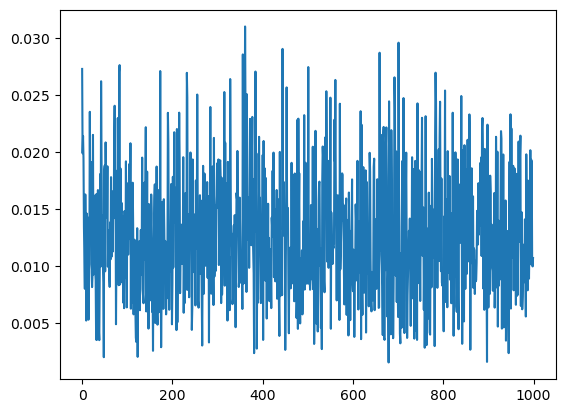

In [5]:
traj = mdj.load_dcd('../000_eq/outputs/traj.dcd', '../inputs/complex.pdb')
coms = mdj.compute_center_of_mass(traj, select="protein and type!='H'")
dist = np.linalg.norm(coms - pdb_crys_com, axis=1)
plt.plot(dist)
print(coms[-1])

In [31]:
dist = np.linalg.norm(coms - ref_com, axis=1)
np.argmax(dist)

10010

In [4]:
traj = mdj.load_dcd('../001_RMSDBound/outputs/traj.dcd', '../inputs/complex.pdb')
new_traj = traj[-5:]
new_traj.save_dcd("traj_test.dcd")
